In [29]:
%precision %.2f
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 12]
import pandas as pd
import numpy as np
from datetime import date

import src.compute.developer as developer
from src.compute.utils import Interval
from src.db.utils import SnowflakeWrapper

pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
conn = SnowflakeWrapper.create_snowflake_connection()
sw = SnowflakeWrapper(conn)
figure_size = (14, 12)

In [30]:
import numpy as np
import scipy.stats as stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    # can't be used because we don't have the same distribution in our data
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [31]:
active_interval: Interval = Interval(
    # fromDate=date(2019, 7, 1), # year, month, day
    # toDate=date(2019, 10, 1),
    fromDate=date(2019, 10, 1), # year, month, day
    toDate=date(2020, 1, 1)
)
print(active_interval)

('2019-10-01', '2020-01-01')


In [32]:
by_status = developer.get_all_developers_by_status(sw, active_interval)
status = "Development"
data = by_status[status].set_index("USERID")
by_day = data["AVG_DAY"].dropna()
print(len(by_day), len(data["AVG_DAY"]))
by_day_na = data["AVG_DAY"]
chosen_user = data.loc['marko.prelevikj', :]

49 197


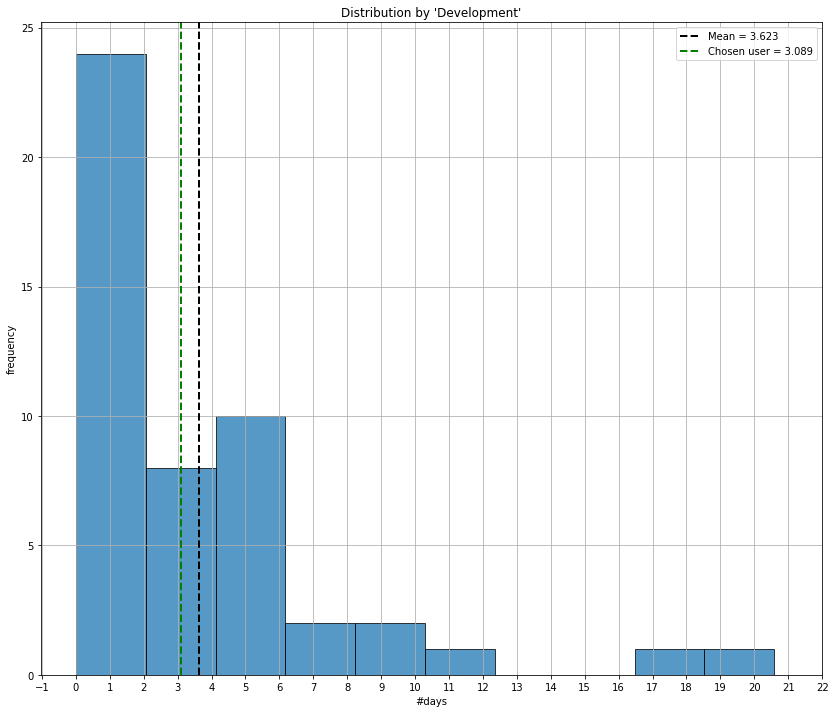

In [33]:
num_bins = 10
plt.hist(by_day, bins=num_bins, alpha=0.75, edgecolor='black')
plt.xticks(np.arange(np.ceil(by_day.min()) - 2,np.ceil(by_day.max()) + 2,1))
plt.axvline(by_day.mean(), color='black', linestyle='dashed', linewidth=2, label=f"Mean = {by_day.mean():.3f}")
plt.axvline(chosen_user["AVG_DAY"], color='g', linestyle='dashed', linewidth=2, label=f'Chosen user = {chosen_user["AVG_DAY"]:.3f}')

plt.title(f"Distribution by '{status}'")
plt.xlabel("#days")
plt.ylabel("frequency")
plt.legend()
plt.grid()
plt.show()

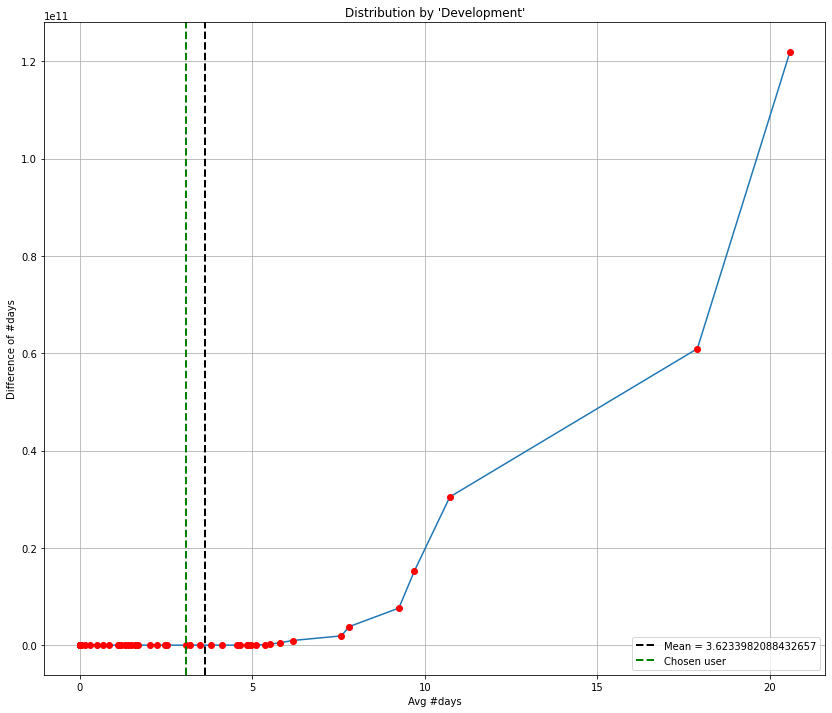

In [34]:
# plot power law (?)
sorted_by_day = by_day.sort_values()
sum = 0
x_vals = [0]
for x, y in zip(sorted_by_day, sorted_by_day[1:]):
    diff = y - x + sum
    sum += diff
    x_vals.append(diff)

plt.plot(sorted_by_day,x_vals)
plt.plot(sorted_by_day,x_vals, 'ro')

plt.axvline(by_day.mean(), color='k', linestyle='dashed', linewidth=2, label=f"Mean = {by_day.mean()}")
plt.axvline(chosen_user["AVG_DAY"], color='g', linestyle='dashed', linewidth=2, label=f"Chosen user")
plt.xlabel("Avg #days")
plt.ylabel("Difference of #days")
plt.title(f"Distribution by '{status}'")
plt.grid()
plt.legend()
plt.show()